In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# get a warning if we don't do this
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
plt.rcParams['figure.dpi'] = 120

In [4]:
df = pd.read_csv('beijing_pollution.csv')

In [5]:
df.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0

In [6]:
df.columns[5:]

Index(['pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir'], dtype='object')

In [7]:
idx = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df2 = df.iloc[:, 5:]
df2['Date'] = idx
# df2 = df2.set_index(df2.Date).drop('Date', axis=1)

## Filtering examples

The basic idea is: take the timeseries, low pass filter it. Subtract the low pass filtered timeseries from the original to get the high pass filtered timeseries. 

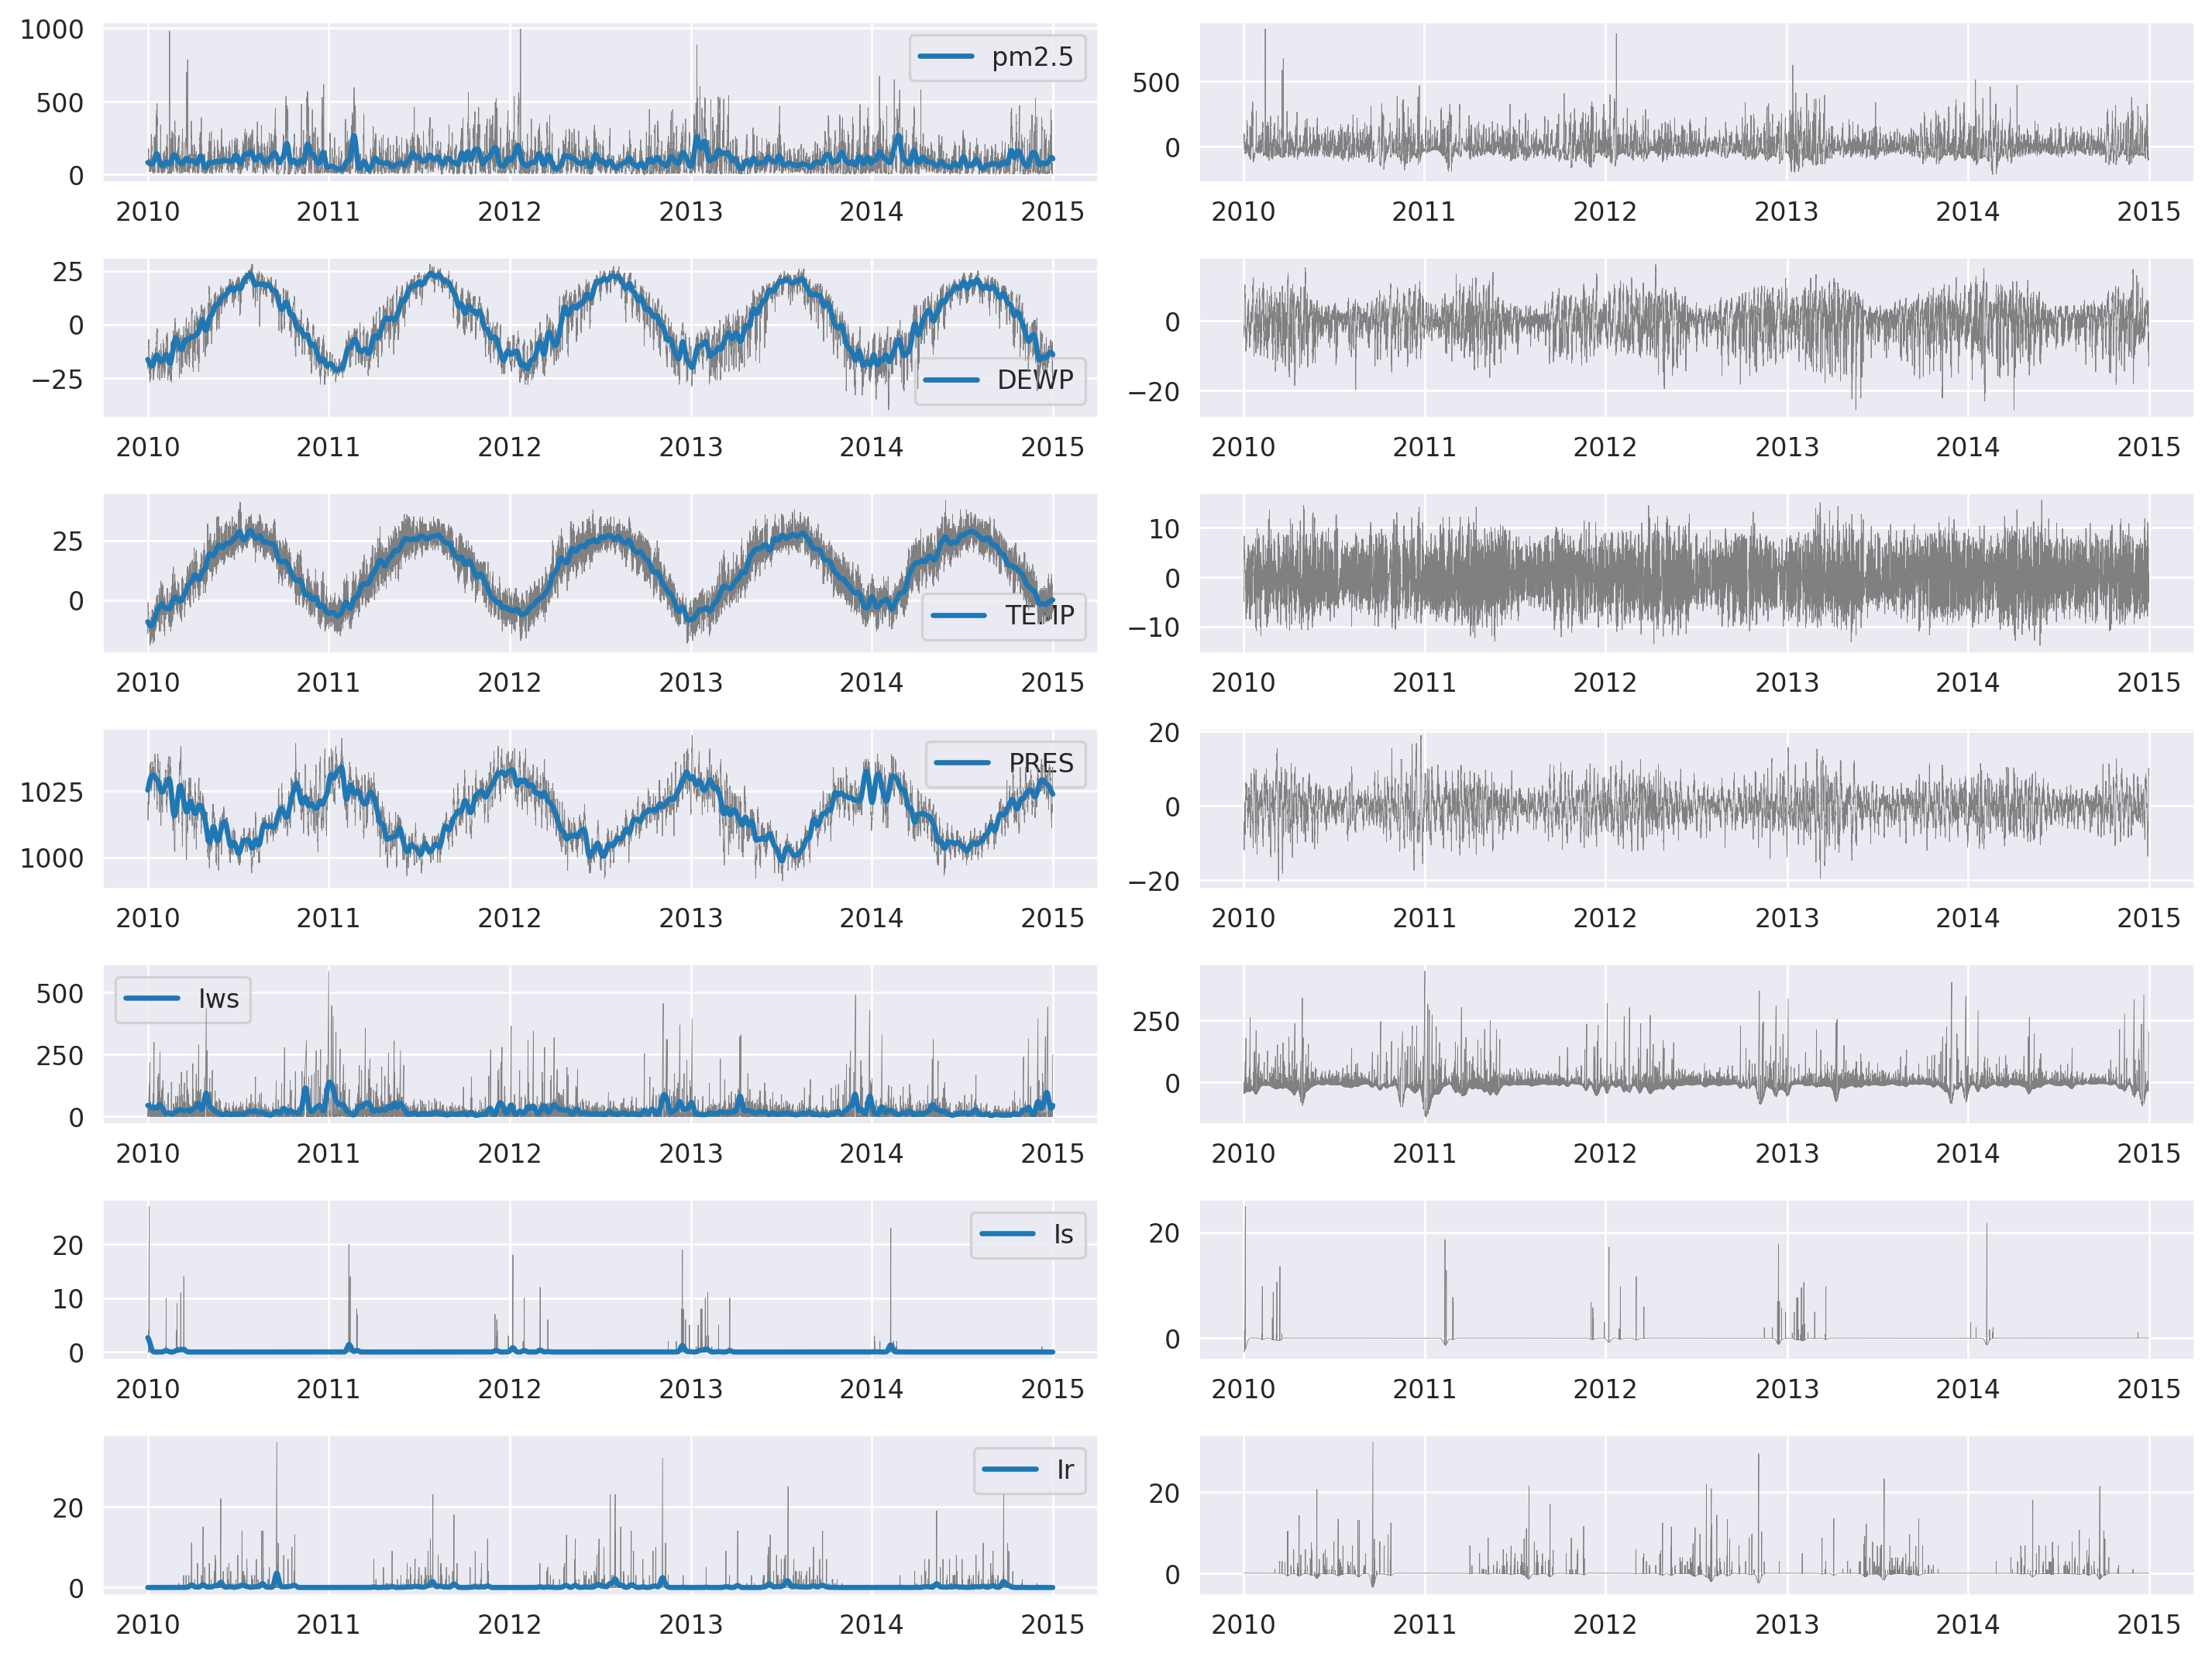

In [11]:
# start with original dataframe, with a datetimeindex and dropped text columns
# Then, using pandas rolling function, take the 3 week (3 wk * 7 days *24 hours),
# Blackman window (look this up if needed) weighted, centered rolling mean. 
# This timeseries has a few small gaps, and we can fill them while doing the 
# low pass filterin when at least min_periods (24) of the total (3*7*24) 
# points are present. 
#
# At this point, we have a set of low pass filtered timeseries. 
df_lowpass = df2.set_index(df2.Date).drop(['cbwd', 'Date'], axis=1).rolling(
    3*7*24, center=True, win_type='blackman', min_periods=24).mean()

# original dataframe, with a datetimeindex and dropped text columns
df_orig = df2.set_index(df2.Date).drop(['cbwd', 'Date'], axis=1)

# highpass
df_highpass = df_orig - df_lowpass

N = df_lowpass.columns.shape[0]

for i in range(N):
    ax = plt.subplot(N, 2, 2*i+1)
    sns.lineplot(df_orig.index.values, df_orig.iloc[:, i].values, 
                 label=None, lw=0.25, color='gray', zorder=10)
    sns.lineplot(df_lowpass.index.values, df_lowpass.iloc[:, i].values, 
                 label=df_lowpass.columns[i], lw=2, zorder=200)
    
    ax = plt.subplot(N, 2, 2*i+2)
    sns.lineplot(df_highpass.index.values, df_highpass.iloc[:, i].values, 
                 label=None, lw=0.25, color='gray', zorder=10)
    
plt.gcf().set_size_inches(12, 9)
plt.tight_layout()